# Lab 2-2. Decision Tree

 ### 간단하교 효과적인 머신러닝 툴인 Scikit-learn 패키지를 사용한 Decision Tree Tutorial
*   Classification Tree, Regression Tree
*   Random Forest, Gradient Boost

[Ref.]
*   https://scikit-learn.org/stable/modules/tree.html
*   https://scikit-learn.org/stable/modules/ensemble.html






---
## Classification Tree


### Load Diabetes Dataset from Google Drive

#### 당뇨병 데이터 셋

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
diabetes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/diabetes.csv')
print(diabetes.columns)
diabetes.head()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8] # target값 빼고 피쳐생성해둠. 시각화를 위해.

In [5]:
diabetes_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [6]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


### Split and prepare the dataset

In [7]:
train = diabetes[:650]
test = diabetes[650:]

In [8]:
x_train = np.asarray(train.drop('Outcome',1))
y_train = np.asarray(train['Outcome'])
x_test = np.asarray(test.drop('Outcome',1))
y_test = np.asarray(test['Outcome'])

### Decision Tree

In [9]:
from sklearn import tree 

In [10]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0) # Gini by default
clf.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(clf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(x_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.703


## ***요 부분 중요하다. 

트레이닝 셋에서의 정확도는 100%이나, 테스트셋에서의 정확도는 떨어짐. 즉, overfitting 되어 새로운 데이터에 generalize가 안된다는 뜻.

#### Visualize Tree
### 트리 시각화 툴

[Ellipsis]

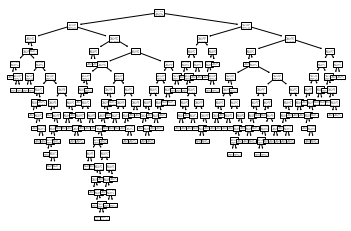

In [11]:
tree.plot_tree(clf)
[...]

## 딱봐도 트리가 너무 크고, 복잡하다. ->>> 과적합되었다. training셋에게만 맞는다.

 Pre-pruning, max_depth=3 으로 설정해서 오버피팅을 방지한다. 트레이닝 셋에서의 정확도는 떨어지지만, 테스트 셋에서의 성능은 올라간다. 
 그 외에도 [post pruning with cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)를 활용할 수 있다.

In [12]:
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(x_test, y_test)))

Accuracy on training set: 0.783
Accuracy on test set: 0.763


[Ellipsis]

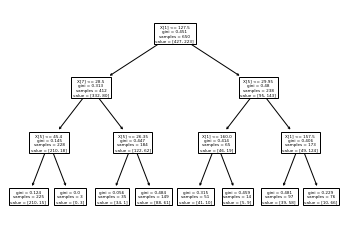

In [13]:
tree.plot_tree(clf)
[...]

## 간단해졌다. 과적합이 감소되었다.

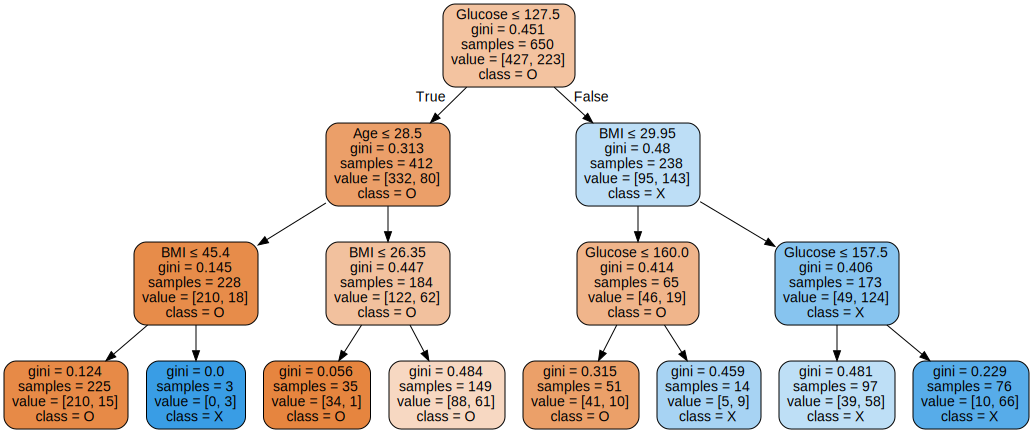

In [14]:
# 이것도 시각화 함수

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=diabetes_features,  
                     class_names=['O','X'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


# 스플릿한 분기조건,지니계수 등등 알려줌

#### Feature importance in Decision trees (시각화용)
강의에서 다룬 Variable Importance Measure와 같음.
각각의 예측변수가 decision에 있어서 얼마나 중요한지 0과 1사이의 값으로 모두 합쳐서 1이 되도록 나타냄

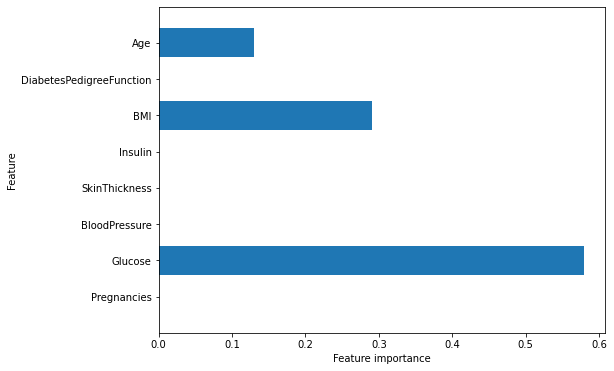

In [15]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(clf)

### Random Forest

diabetes dataset에 100개의 트리로 구성된 Random Forest를 적용해보자.

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.754


75.4%의 성능으로, Single tree 모델보다 성능이 떨어짐. 또한, Overfitting됨
따라서 max_features를 줄이고, max_depth를 준다.

In [34]:
rf1 = RandomForestClassifier(max_features=3, max_depth=3, n_estimators=800, random_state=0)
rf1.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(x_test, y_test)))

# max_feature 3 , max_depth =3 , n_estimator =800으로 조정해서 돌려보았다.

Accuracy on training set: 0.802
Accuracy on test set: 0.780


#### Feature importance in Random Forest

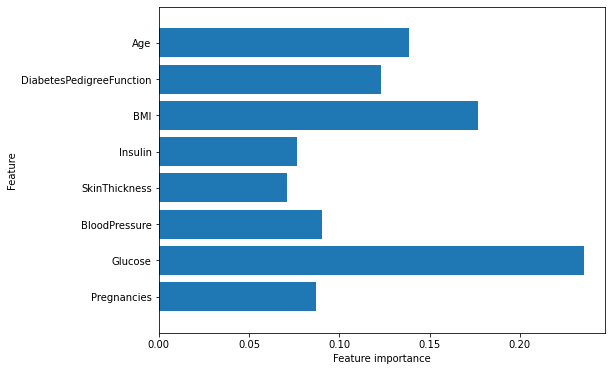

In [35]:
plot_feature_importances_diabetes(rf)

Single tree와 마찬가지로 글루코스와 BMI의 중요도가 높음. 반면, Random forest의 randomness 때문에 더 다양한 변수들을 고려하는걸 볼 수 있다.

### Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(x_test, y_test)))

Accuracy on training set: 0.914
Accuracy on test set: 0.771


overfitting을 줄이기 위해서, maximum depth로 pre-pruning을 해준다.

In [37]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=2) # by deafult 3
gb1.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(x_test, y_test)))

Accuracy on training set: 0.855
Accuracy on test set: 0.754


In [38]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01) # by default 0.1
gb2.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(x_test, y_test)))

Accuracy on training set: 0.797
Accuracy on test set: 0.754


두 방법 모두 모델의 complexity를 줄이면서 training set의 성능이 test set과 가까워졌다. 그러나 test set에서의 성능이 딱히 개선되지 않았다.

#### Feature importance in Gradient Boosting

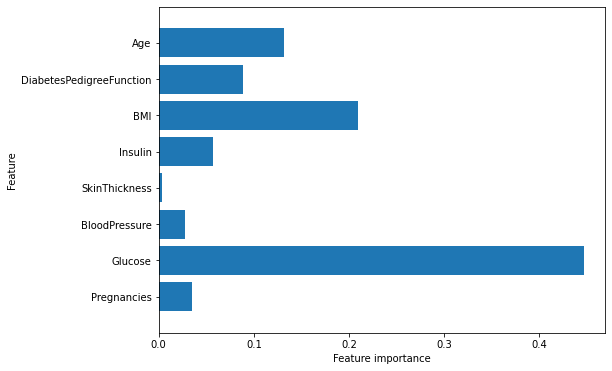

In [39]:
plot_feature_importances_diabetes(gb1)

Random forest의 feature importance와 비슷함.



---
## Regression Tree



### Simple regression tree using synthetic data

In [40]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [41]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel() # ravel함수로 2차원->1차원으로 바꿔준다.
y[::5] += 3 * (0.5 - rng.rand(16)) # [::5]는 5씩 띄운다


In [42]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [43]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)


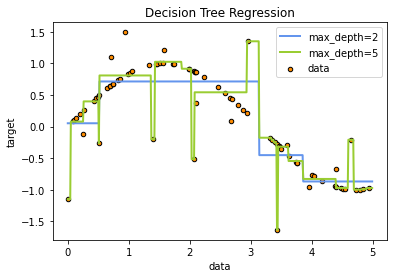

In [44]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


# depth=5는 노이즈에 오버피팅되서 성능이 안좋다. depth=3이 더 적절하다.

### Regression Tree with Tada ETA data

#### 타다 데이터



*   ATA: Actual Time of Arrival
*   ETA: Expected Time of Arrival
*   api_eta: 앱 API에서 예측된 ETA



In [45]:
tada_eta = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/tada_eta.xlsx')
print(tada_eta.columns)
tada_eta.head()

Index(['ATA', 'id', 'api_eta', 'created_at_kst', 'month', 'pickup_lng',
       'pickup_lat', 'pickup_gu', 'driver_id', 'driver_lng', 'driver_lat',
       'hour'],
      dtype='object')


,ATA,id,api_eta,created_at_kst,month,pickup_lng,pickup_lat,pickup_gu,driver_id,driver_lng,driver_lat,hour
0,10.60,R4L9FL6NVEL4D0,5.65,2019-12-01T00:55:09,12,127.091399,37.624545,노원구,DST52944,127.069978,37.616472,0
1,9.20,R3A7JBY7CS6TPD,8.60,2019-12-01T00:09:39,12,127.023351,37.625564,강북구,DPC72995,127.026479,37.604711,0
2,10.85,R2BIUY1TDK14XE,10.53,2019-12-15T00:18:42,12,126.881154,37.481641,금천구,DPP94923,126.906225,37.452167,0
3,5.52,R31PU5GNHSGU6C,1.92,2019-07-31T00:24:11,7,126.988375,37.567897,중구,DCT73585,126.991170,37.566416,0
4,8.60,R41WR6N1VT42DJ,7.10,2019-07-05T00:40:34,7,126.988684,37.566716,중구,DPJ86237,127.006860,37.571164,0


In [46]:
tada_eta['distance'] = ((tada_eta['pickup_lat']-tada_eta['driver_lat'])**2 + (tada_eta['pickup_lng']-tada_eta['driver_lng'])**2)*100000
tada_eta = tada_eta.drop(['id', 'created_at_kst', 'driver_id', 'pickup_lng', 'pickup_lat', 'driver_lng','driver_lat','pickup_gu'],1)
tada_eta.head()

# sklearn의 tree는 범주 데이터는 다루지 못함. 이 경우에 one-hot encoding은 비효율적. 구 데이터도 활용하고 싶다면 h2o 참고

,ATA,api_eta,month,hour,distance
0,10.60,5.65,12,0,52.400202
1,9.20,8.60,12,0,44.465889
2,10.85,10.53,12,0,149.731535
3,5.52,1.92,7,0,1.000535
4,8.60,7.10,7,0,35.014797


In [47]:
tada_eta = tada_eta.sample(frac=1).reset_index(drop=True) # frac : 샘플링비율. 1은 전체를 뜻한다.
tada_eta.head()

,ATA,api_eta,month,hour,distance
0,10.37,8.38,12,1,46.793491
1,4.95,4.03,12,7,8.504458
2,9.55,7.65,12,8,29.923147
3,11.93,8.43,12,7,16.146062
4,7.00,2.53,12,17,6.958957


In [48]:
tada_eta.shape

(13916, 5)

In [49]:
train = tada_eta[:12000]
test = tada_eta[12000:]

In [50]:
x_train = np.asarray(train.drop('ATA',1))
y_train = np.asarray(train['ATA'])
x_test = np.asarray(test.drop('ATA',1))
y_test = np.asarray(test['ATA'])
eta_features = [x for i,x in enumerate(tada_eta.columns) if i!=0]

In [51]:
eta_features

['api_eta', 'month', 'hour', 'distance']

#### Gradient Boosting 사용

In [53]:
params = {'n_estimators': 100, # 트리의 개수
          'max_depth': 3,
           'min_samples_leaf': 5,
          'learning_rate': 0.05,
          'loss': 'ls'} # 'squared_error'와 같음

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error # 절대값
from sklearn import ensemble

In [55]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

The mean squared error (MSE) on test set: 8.8012
The initial error of API ETA on test set: 14.2730
The mean absolute error (MAE) on test set: 2.1040
The initial error of API ETA on test set: 2.6675


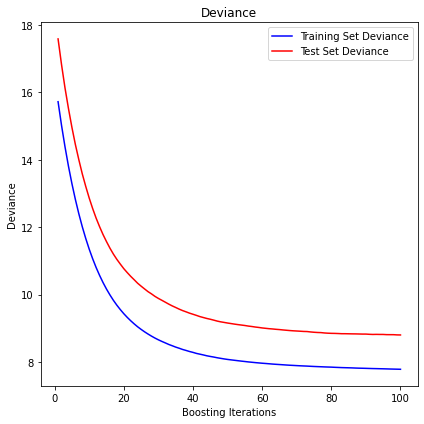

In [56]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(x_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

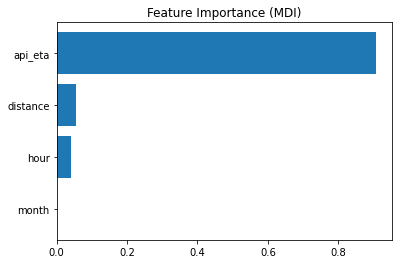

In [57]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(eta_features)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()

### HW 2: Make a better model for TADA ETA data
tree parameter를 바꾸거나, 아예 다른 알고리즘을 사용해도 됨.
트레이닝 데이터도 조작해도 되지만, 테스트셋은 조작 금지 

```
test = tada_eta[12000:]
```



[Ref.]
*   https://scikit-learn.org/stable/modules/tree.html
*   https://scikit-learn.org/stable/modules/ensemble.html


In [ ]:
# mse = mean_squared_error(y_test, reg.predict(x_test))
# print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
# print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

# mae = mean_absolute_error(y_test, reg.predict(x_test))
# print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
# print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))